In [1]:
import numpy as np 
import pandas as pd

In [84]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

pio.templates.default = 'plotly_dark'

In [21]:
import plotly.express as px

Attribute Information:

For more information, read [Cortez and Morais, 2007]. 
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).



In [15]:
df = pd.read_csv("../../input_data/forestfires.csv")

In [55]:
df.month = df.month.str.capitalize()
df.day = df.day.str.capitalize()

In [57]:
df2 = df

In [60]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df2['months'] = pd.Categorical(df2['month'], categories=months, ordered=True)

In [65]:
df2.sort_values('months')

X  Y month  day  FFMC   DMC     DC  ISI  temp   RH  wind  rain   area  \
104  2  4   Jan  Sat  82.1   3.7    9.3  2.9   5.3   78   3.1   0.0   0.00   
379  4  5   Jan  Sun  18.7   1.1  171.4  0.0   5.2  100   0.9   0.0   0.00   
96   3  4   Feb  Sat  83.9   8.0   30.2  2.6  12.7   48   1.8   0.0   0.00   
59   2  2   Feb  Fri  86.6  13.2   43.0  5.3  12.3   51   0.9   0.0   0.00   
202  7  4   Feb  Sun  83.9   8.7   32.1  2.1   8.8   68   2.2   0.0  13.05   
..  .. ..   ...  ...   ...   ...    ...  ...   ...  ...   ...   ...    ...   
274  8  6   Dec  Wed  84.0  27.8  354.6  5.3   5.1   61   8.0   0.0  11.19   
281  6  5   Dec  Tue  85.4  25.4  349.7  2.6   5.1   24   8.5   0.0  24.77   
273  4  6   Dec  Sun  84.4  27.2  353.5  6.8   4.8   57   8.5   0.0   8.98   
279  4  4   Dec  Mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0   9.77   
278  4  4   Dec  Mon  85.4  25.4  349.7  2.6   4.6   21   8.5   0.0  22.03   

    months  
104    Jan  
379    Jan  
96     Feb  
59     Feb  
202    Feb  
..     ...  
274    Dec  
281    Dec  
273    Dec  
279    Dec  
278    Dec  

[517 rows x 14 columns]

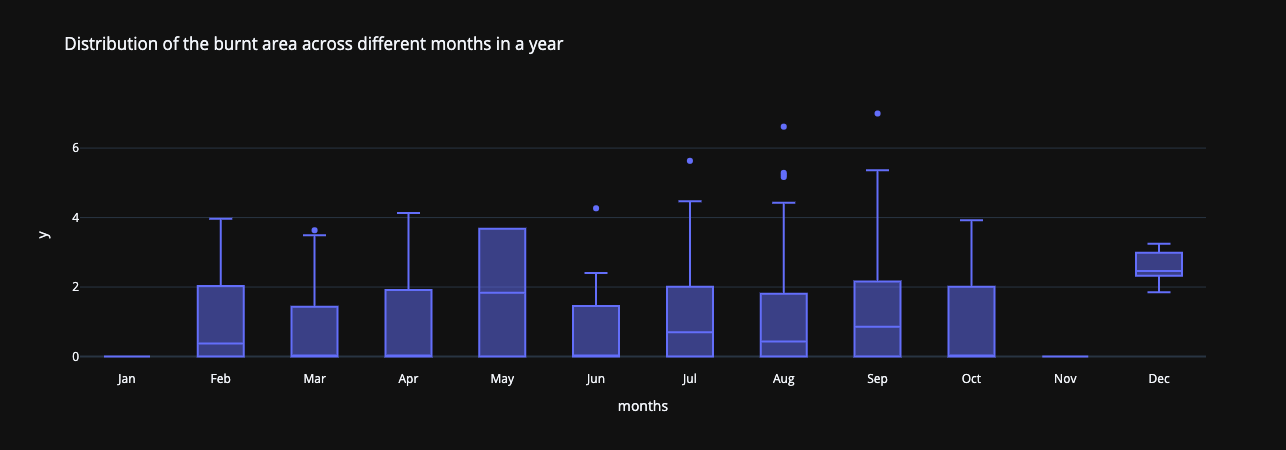

In [82]:
a = df2.loc[: , ["area", "months"]].sort_values("months")
fig = px.box(a,x='months', y=np.log1p(a.area), title = 'Distribution of the burnt area across different months in a year')
fig.show()